# Machine Learning and the MNC

![xkcd: Machine Learning](https://imgs.xkcd.com/comics/machine_learning.png)

[xkcd: Machine Learning](https://xkcd.com/1838/)

## About this Course

### Premises

1. Many machine learning methods are relevant and useful in a wide range of 
academic and non-academic disciplines.

1. Machine learning should not be viewed as a black box.

1. It is important to know what job is performed by each cog - it is not 
necessary to have the skills to construct the machine inside the (black) box.

1. You are interested in applying machine learning to real-world problems.

### Vision

By the end of the lecture you will:

- Understand fundamental machine learning concepts.
- Gain hands on experience by working on business-related use cases.
- Develop an understanding for typical challenges, be able to ask the right questions when assessing a model and be able to frame business related questions as ML projects.

### Challenges

Machine Learning is a very broad, deep and quickly developing field with progress being made in 
both academia and industry at breathtaking pace.
Yet, fundamental concepts to not change and we will therefore focus on exactly these concept - at times at the price of not applying most state of the art tools or methods.

As understanding complex systems is greatly facilitated by gaining practical experience using them, this lecture takes a very hands on approach. In doing so, we will employ the the Python programming language and its Data Science and ML ecosystem. Yet again, for those unfamiliar with Python, learning a new programming language is always a challenge.

### Notes

While we will use Python as primary tool, the concepts discussed in this course are independent of the programming language. However, the employed libraries will help to maintain a high level perspective on the problem without the need to deal with numerical details.

## About Machine Learning

### What are Machine Learning Use Cases?

In everyday life:
- Automatic face recognition
- Automatic text translation
- Automatic speech recognition
- Spam filter
- Recommendation systems
- ...

And elsewhere:
- Fraught detection
- Predictive maintenance
- Diagnosing diseases
- Sentiment/Topic analysis in texts
- ...

What do these applications have in common?
- Data
- Complexity
- Need to scale as data increases
- Need to evolve as data changes
- Need to learn from data

### What is Machine Learning?

\[ISL]:

> *Statistical learning* refers to a vast set of tools for *understanding data*.

\[HandsOn]:

> Machine Learning is the science (and art) of programming computers so they can *learn from data*.

### How does a Machine Learning Process look like?

#### Traditional Approach

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch01.html">
<img src="../images/handson/mlst_0101.png" alt="Traditional Approach" width="50%">
</a>

Comments:
- Writing rules may be hard if not outright impossible.
- Not clear how to update rules when new data arrives.

#### Machine Learning Approach

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch01.html">
<img src="../images/handson/mlst_0102.png" alt="Traditional Approach" width="50%">
</a>

Comments:
- Rule detection/specification is left to an algorithm.
- When new data arrives, the model is retrained.

Machine Learning systems be automated to incrementally improve over time.

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch01.html">
<img src="../images/handson/mlst_0103.png" alt="ML Approach" width="50%">
</a>

In addition, Machine Learning can be used to gain insights from data that is otherwise not available. It must no necessarily be *lots* of data.

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch01.html">
<img src="../images/handson/mlst_0104.png" alt="Traditional Approach" width="50%">
</a>

### What is Machine Learning good for?

\[HandsOn]:

> Machine Learning is great for:
> - Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better
> - Complex problems for which there is no good solution at all using traditional approach: the best Machine Learning techniques can [may] find a solution.
> - Fluctuating environments: a Machine Learning system can adapt to new data.
> - Getting insights about problems and (large amounts of) data.

Machine Learning is typically used as part of a decision making process and may therefore be accompanied by (or even include) a cost benefit analysis.

## Python

> Python is an interpreted, high-level, general-purpose programming language.

> Created by Guido van Rossum and first released in 1991, Python's design philosophy emphasizes code readability [...].

> Its language constructs [...] aim to help programmers write clear, logical code for small and large-scale projects.

[Wikipedia](https://en.wikipedia.org/wiki/Python_(programming_language))

---

*Python has a very large scientific computing and Machine Learning ecosystem.*

## Machine Learning with Python

In this lecture, we will primarily use [scikit-learn](https://scikit-learn.org/stable/).


<a href="https://scikit-learn.org/stable/">
<img src="../images/sklearn/scikit-learn-logo-small.png" alt="scikit learn" width="20%">
</a>

Scikit-learn is a prominent, production-ready library used in both academia and industry with [endorsements](https://scikit-learn.org/stable/testimonials/testimonials.html) from e.g. [JPMorgan](https://www.jpmorgan.com/), [Spotify](https://www.spotify.com/), [Inria](https://www.inria.fr/), [Evernote](https://evernote.com/) and others.

One of the particular features is its very simple and uniform [API](https://en.wikipedia.org/wiki/Application_programming_interface) which allows to use a wide range of different models through very little different commands.
In addition, it provides a set of utilities typically needed for developing a Machine Learning system.

### Generic Use

Using scikit-learn typically involves at least the following steps:

```python
# 0. train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 1. choose a model
from sklearn.model_family import DesiredModel

# 2. instantiate a model with certain parameters
model = DesiredModel(model_parameters)

# 3. fit a model to the data
model.fit(X_train, y_train)

# 4. evaluate
model.score(X_test, y_test), model.score(X_train, y_train)

# 5. use the model to make a prediction
y_new = model.predict(X_new)
```

Although there are a lot of things going on in the background, the basic actions always take a form similar to this.

### A Simple Example

**Problem:**
- Input: 2D data, i.e. variables x1 and x2
- Output: binary, i.e. a variable y taking only values {0, 1} (=classes)
- Objective: separate input space according to class values

(<Figure size 640x480 with 1 Axes>, <Axes: >)

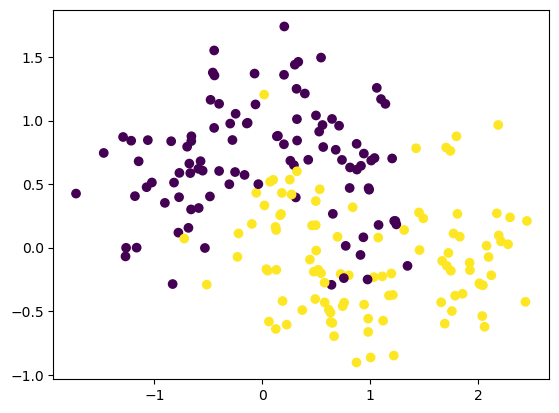

In [1]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier


def load_data(**wargs):
    # experiment by setting the parameters to different values 
    # and observe the result
    return make_moons(n_samples=200, noise=0.3, random_state=42)

def visualize_data(X, y):
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y)
    return fig, ax


X, y = load_data()
visualize_data(X, y)

<Axes: >

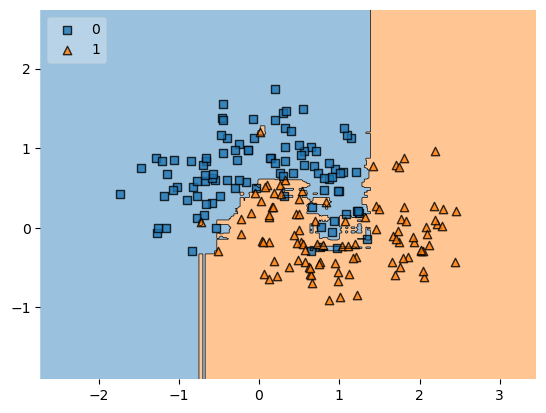

In [2]:
# SCIKIT-LEARN: start

# 1. chose a model
from sklearn.ensemble import RandomForestClassifier
# 2. set model parameters (perform parameter search e.g. using GridSearchCV)
model = RandomForestClassifier(n_estimators=100, random_state=42)
# 3. fit model
model.fit(X, y)
# 4. predict
model.predict(X)
# 5. inspect
plot_decision_regions(X, y, clf=model, legend=2)

# SCIKIT-LEARN: end

Observe how the model has successfully captured the shape of the data.

## A First Application

*Head over to the advertising notebook.*